Name: 
Type: Graph
Number of nodes: 501
Number of edges: 2872
Average degree:  11.4651


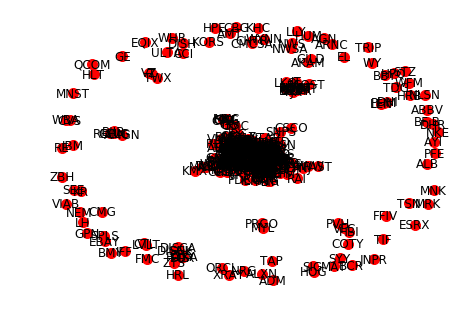

In [106]:
import os
import pandas as pd
import networkx as nx
import pickle
from random import shuffle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

# there might be tickers that the web can not reach
tickers= [t for t in tickers if os.path.exists('stock_dfs/{}.csv'.format(t))]
shuffle(tickers)


def cor_table(stocks , rate = False):
    if not rate:
        df = pd.read_csv('sp500_joined_closes.csv')
    if rate:
        df = pd.read_csv('sp500_joined_rates.csv')
    df = df[stocks]
    '''
        #choose number of stocks involved
        #df = df.ix[:,0:10]
        #choose several particular stock involve
        #df = df[['GOOG','MSFT','IBM','AAPL','FB','ORCL','AMZN']]
        '''
    # we can see the whole correlation table
    df_corr = df.corr()
    return df_corr

tickers = tickers[1:]
G=nx.Graph()
G.add_nodes_from(tickers)
correlation_table =  cor_table(tickers, rate = True)
edges = [(x,y) for x in tickers for y in tickers if abs(correlation_table[x][y]) > 0.5 and x != y ]
G.add_edges_from(edges)
## add weigh attribute in the edges
# for edge in edges:
#     G[edge[0]][edge[1]]['weight'] = correlation_table[edge[0]][edge[1]]
print(nx.info(G))
nx.draw(G, with_labels = True, node_size = 100, layout = nx.spring_layout(G)),
plt.show()
nx.write_graphml(G, "test.graphml")